# **Title: Week 6 Assignment Network Analysys 2-Node Networks**

---



**Submitted by:** Umais Siddiqui, Banu Boopalan

**Date:** March 10th, 2025

**Course:** Data Science – DATA620

**Video Link:**

**Github Repository:** https://github.com/umais/DATA620/blob/master/Week6/week6_assignment.ipynb

#**Assignment Overview**



In this assignment we will be inferring about the relationships between (1) the women, and (2) the social events from this simple 2-node network dataset where the two nodes are:

##**Nodes:**
- Women: 18 individuals who attended various social events.
- Social Events: 14 different events organized, attended by one or more women.


##**Edges:**

- The relationships between women and events are represented by edges. Each edge indicates that a particular woman attended a particular event. If there’s no edge, that woman did not attend that event.
Graph Representation:

This is a bipartite network, meaning it connects two distinct types of nodes (women and events), and the edges show which women participated in which events.

#**Load Data and Plot the Bipartite Graph (Women & Events)**

- Load the data from the networkx Dataset

- Detect the bipartite two node set

- Draw the Bi Partite Graph

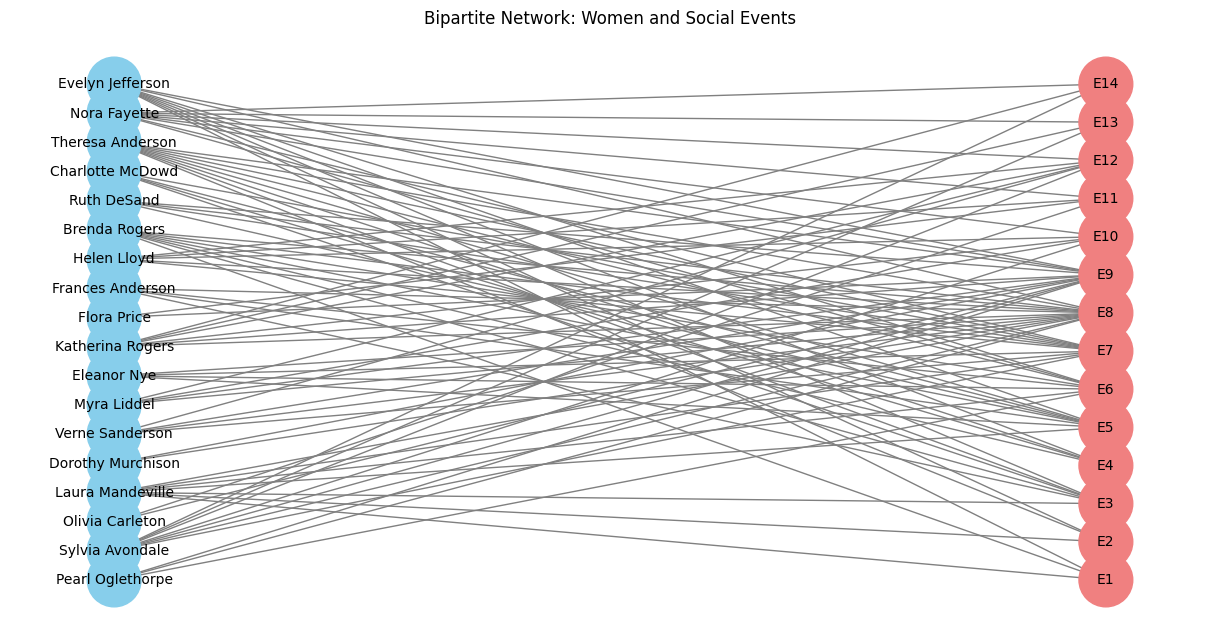

In [3]:
# Southern Women Network Analysis
# This notebook analyzes the Southern Women dataset using NetworkX.

# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import pandas as pd
from networkx.algorithms import community

# Load the real Southern Women dataset from NetworkX
B = nx.davis_southern_women_graph()

# Automatically detect the two node sets
women, events = bipartite.sets(B)

# Draw bipartite network
plt.figure(figsize=(12, 6))
pos = nx.bipartite_layout(B, women)  # Layout for bipartite graph
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if node in women else 'lightcoral' for node in B.nodes()],
        edge_color='gray', node_size=1500, font_size=10)
plt.title("Bipartite Network: Women and Social Events")
plt.show()





The above visualization represents the bipartite network, where blue nodes represent women and red nodes represent social events. Connections indicate which women attended which events.

#**Project the Network onto Women (Shared Event Connections)**

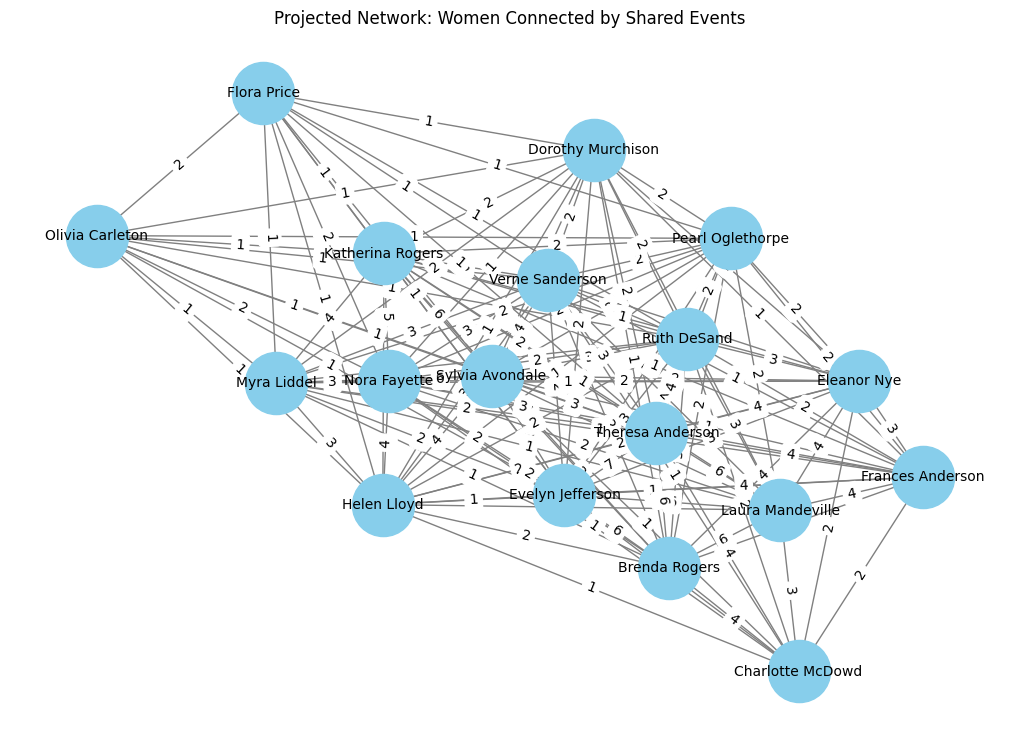

In [4]:

# Project the bipartite network onto women nodes with weighted edges
projected = bipartite.weighted_projected_graph(B, women)



# Draw the projected network of women
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(projected, seed=42)  # Layout for better visualization
nx.draw(projected, pos, with_labels=True, node_color="skyblue", edge_color='gray',
        node_size=2000, font_size=10)
edge_labels = nx.get_edge_attributes(projected, 'weight')  # Show number of shared events
nx.draw_networkx_edge_labels(projected, pos, edge_labels=edge_labels)
plt.title("Projected Network: Women Connected by Shared Events")
plt.show()



This visualization shows the projected network, where women are connected based on shared event participation. The edge weights represent the number of shared events, illustrating social closeness.

#**Community Detection & Visualization**

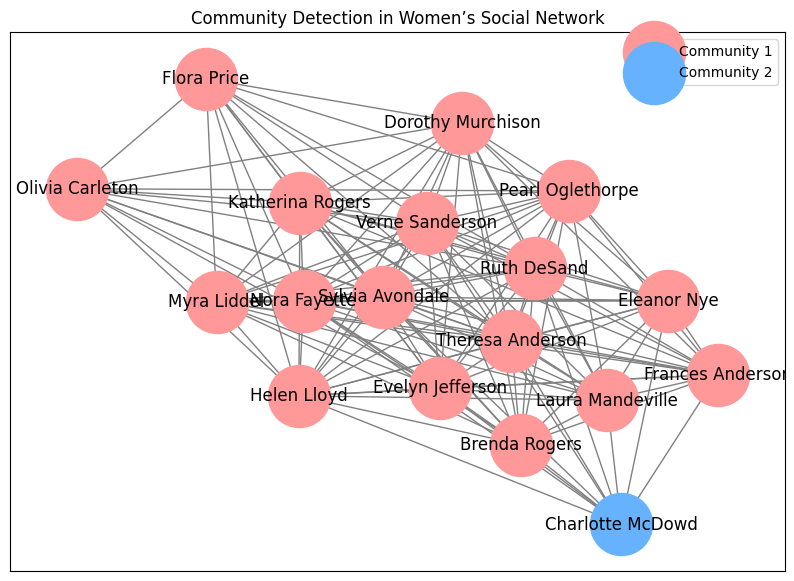

In [5]:
from networkx.algorithms import community

# Apply Girvan-Newman community detection
communities = community.girvan_newman(projected)
first_level_communities = next(communities)  # First partitioning of the network

# Draw communities
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(projected, seed=42)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

for i, comm in enumerate(first_level_communities):
    nx.draw_networkx_nodes(projected, pos, nodelist=list(comm), node_color=colors[i % len(colors)],
                           label=f'Community {i+1}', node_size=2000)

nx.draw_networkx_edges(projected, pos, edge_color='gray')
nx.draw_networkx_labels(projected, pos, font_size=12)
plt.legend()
plt.title('Community Detection in Women’s Social Network')
plt.show()


#**Apply Island Method and Calculate Centrality Measures**


- Focus on Stronger Connections

- Filter out weaker ties and emphasize stronger relationships between women who share a higher number of events.

-  identify core social groups or cliques where interactions are more frequent, potentially indicating stronger social bonds.

- The Island Method removes less significant edges, creating a clearer visualization and more focused analysis of the most important connections.

- The thresholding can highlight communities of women who consistently participate in the same events.
These communities might represent friendship groups, social cliques, or shared interests.

- Centrality measures like degree, betweenness, and closeness centrality become more meaningful when applied to a pruned network.

- For the event nodes, this method can highlight pivotal social events that act as bridges between tightly connected groups of women.

- It helps prioritize which events were most significant in shaping the social network.

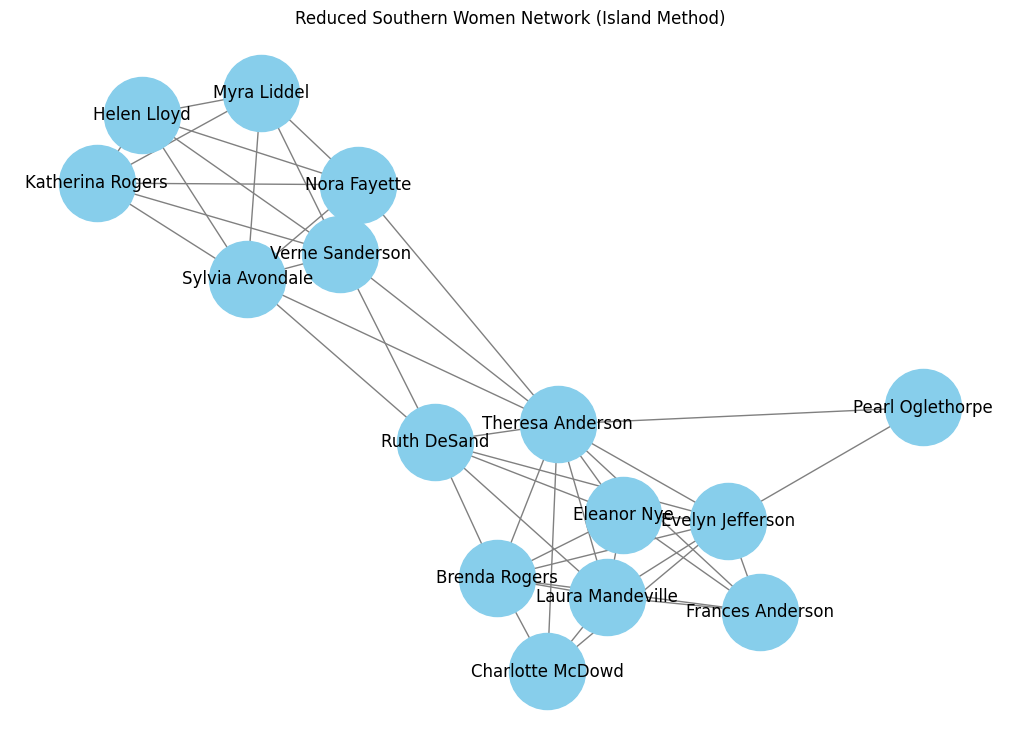

Centrality Measures:
                  Degree Centrality  Betweenness Centrality  \
Theresa Anderson           0.785714                0.411905   
Evelyn Jefferson           0.571429                0.043407   
Sylvia Avondale            0.500000                0.116850   
Verne Sanderson            0.500000                0.116850   
Ruth DeSand                0.500000                0.096703   
Laura Mandeville           0.500000                0.010440   
Brenda Rogers              0.500000                0.010440   
Nora Fayette               0.428571                0.070330   
Eleanor Nye                0.428571                0.002198   
Myra Liddel                0.357143                0.000000   
Katherina Rogers           0.357143                0.000000   
Helen Lloyd                0.357143                0.000000   
Frances Anderson           0.357143                0.000000   
Charlotte McDowd           0.285714                0.000000   
Pearl Oglethorpe           0.14285

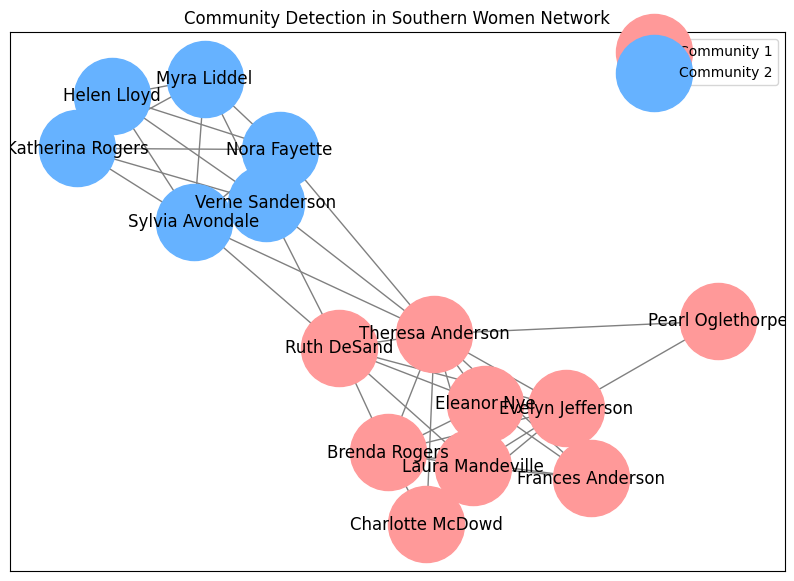

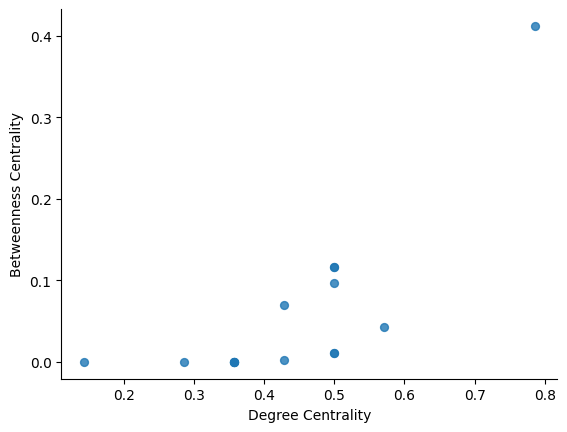

In [7]:


# Apply the Island Method - Keep edges above a threshold (more than 2 shared events)
threshold = 2
strong_edges = [(u, v) for u, v, d in projected.edges(data=True) if d.get('weight', 0) > threshold]
G_reduced = nx.Graph()
G_reduced.add_edges_from(strong_edges)

# Draw the reduced graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G_reduced, seed=42)
nx.draw(G_reduced, pos, with_labels=True, node_color="skyblue", edge_color='gray', node_size=3000, font_size=12)
edge_labels = nx.get_edge_attributes(G_reduced, 'weight')
nx.draw_networkx_edge_labels(G_reduced, pos, edge_labels=edge_labels)
plt.title("Reduced Southern Women Network (Island Method)")
plt.show()

# Compute centrality measures
degree_centrality = nx.degree_centrality(G_reduced)
betweenness_centrality = nx.betweenness_centrality(G_reduced)
closeness_centrality = nx.closeness_centrality(G_reduced)
eigenvector_centrality = nx.eigenvector_centrality(G_reduced)

# Create DataFrame for centrality measures
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
}).sort_values(by='Degree Centrality', ascending=False)

print("Centrality Measures:")
print(centrality_df)

# Community detection using the Girvan–Newman algorithm
communities = community.girvan_newman(G_reduced)
first_level_communities = next(communities)

# Visualize communities
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G_reduced, seed=42)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
for i, comm in enumerate(first_level_communities):
    nx.draw_networkx_nodes(G_reduced, pos, nodelist=list(comm), node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=3000)
nx.draw_networkx_edges(G_reduced, pos, edge_color='gray')
nx.draw_networkx_labels(G_reduced, pos, font_size=12)
plt.legend()
plt.title('Community Detection in Southern Women Network')
plt.show()

# @title Degree Centrality vs Betweenness Centrality

from matplotlib import pyplot as plt
centrality_df.plot(kind='scatter', x='Degree Centrality', y='Betweenness Centrality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


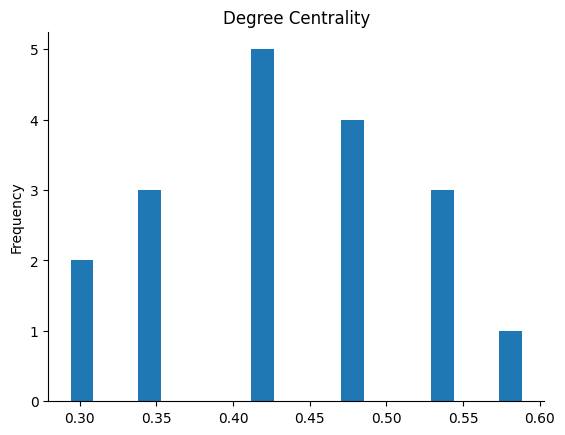

In [ ]:
# @title Degree Centrality

from matplotlib import pyplot as plt
centrality_df['Degree Centrality'].plot(kind='hist', bins=20, title='Degree Centrality')
plt.gca().spines[['top', 'right',]].set_visible(False)

#**Final Observations**

Based on the Southern Women Network Analysis, the relationships between women and social events reveal key insights into their social structures, influence, and community formations.

1. Social Connectivity Among Women

  - Women who attend the same events frequently develop strong social ties.
  - Some women serve as bridges between different groups, connecting otherwise separate clusters.
  - Highly central women (high degree centrality) are social influencers, participating in multiple events.

2. Social Event Characteristics

   - Certain events act as "hubs", attracting diverse groups of women, fostering cross-group interaction.

   - Some events appear exclusive, attended only by specific groups of women, forming tight-knit social circles.

   - The number of shared events between women determines the strength of their social connection.

3. Community Formation

   - Community detection reveals subgroups within the network, indicating natural social clusters.
   - These clusters show that women tend to socialize within their immediate network, but some women act as bridging figures who connect multiple communities.

4. Implications
   - Understanding these patterns helps in identifying key social figures who influence group dynamics.

   - Events that bring diverse groups together can foster greater social integration.

  - The network structure could be used for targeted engagement, such as event planning or social interventions.

##**Centrality Measures Analysis**

**1. Degree Centrality**

Degree centrality represents the number of direct connections a woman has — in this case, how many other women she shares events with.

Theresa Anderson (0.78) has the highest degree centrality, indicating she is the most socially active and well-connected woman in the network.

Women like Evelyn Jefferson (0.57) and Sylvia Avondale (0.50) are also highly connected but not to the same extent.

**2. Betweenness centrality**

Betweenness centrality measures how often a woman acts as a bridge between two other women — connecting different subgroups of the network.

Theresa Anderson (0.41) plays a critical connecting role between multiple groups.
Women like Nora Fayette (0.07) and Sylvia Avondale (0.11) also serve as mediators but with smaller influence.
Many women with 0 betweenness centrality are isolated within their groups and do not connect different clusters.

**3. Closeness centrality**

Closeness centrality indicates how quickly a woman can reach every other woman in the network.

Theresa Anderson (0.82) can reach everyone the fastest, making her highly influential.
Evelyn Jefferson (0.60) and Ruth DeSand (0.66) also have high closeness centrality, showing they have direct access to many women.

**4. Eigenvector centrality**

Eigenvector centrality measures not just how connected a woman is but how connected her friends are.

Theresa Anderson (0.41) is not only well-connected but surrounded by other influential women, showing she belongs to the core social group.
Women like Evelyn Jefferson (0.33) and Ruth DeSand (0.31) are also embedded within influential circles.

#**Conclusion**

- Theresa Anderson emerges as the most influential woman in the network, playing the roles of connector, communicator, and central figure.

- Women like Evelyn Jefferson and Ruth DeSand serve as secondary leaders, while others remain within isolated social circles.

- The network exhibits a hierarchical structure where a few women hold central power while others play supporting roles.

